In [1]:
import pandas as pd
train=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Competitions/Titanic Kaggle/train_clean.csv')

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Family_Size,Superior_Cabins,male,2,3,Q,S,Miss,Mr,Mrs,Other,B,C,D,E,F,G,T,U
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1


In [6]:
passenger_details=train[['Name','Ticket','PassengerId']]
train.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [7]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Family_Size,Superior_Cabins,male,2,3,Q,S,Miss,Mr,Mrs,Other,B,C,D,E,F,G,T,U
0,0,22.0,1,0,7.2500,2,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,2,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,2,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1


In [8]:
y=train['Survived']
x=train.drop('Survived',axis=1)

In [9]:
x.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Superior_Cabins',
       'male', '2', '3', 'Q', 'S', 'Miss', 'Mr', 'Mrs', 'Other', 'B', 'C', 'D',
       'E', 'F', 'G', 'T', 'U'],
      dtype='object')

In [10]:
#Selecting feautres
features=['Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Superior_Cabins',
       'male', '2', '3', 'Q', 'S', 'Miss', 'Mr', 'Mrs', 'Other', 'B', 'C', 'D',
       'E', 'F', 'G', 'T', 'U']

In [11]:
x=train[features]

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.1,random_state=123)

In [13]:
from sklearn.preprocessing import StandardScaler
mms=StandardScaler()
x_scaled_train=mms.fit_transform(x_train)
x_scaled_valid=mms.transform(x_valid)

In [14]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import KFold,cross_val_score

In [15]:
kf5=KFold(n_splits=5)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [17]:
models=[]
models.append(("LogReg",LogisticRegression()))
models.append(("DesicionTree",DecisionTreeClassifier()))
models.append(("SVC",SVC()))
models.append(("kNN",KNeighborsClassifier()))
models.append(("RandomForest",RandomForestClassifier()))

In [18]:
names=[]
result=[]
scoring='accuracy'
for name,model in models:
  model.fit(x_scaled_train,y_train)
  print("Model created:",name, "------>Cross Validation Error:" ,cross_val_score(model,x_scaled_train,y_train,scoring=scoring).mean())
  print("Model created:",name, "------>Validation Error:" ,accuracy_score(y_valid,model.predict(x_scaled_valid)))
  print("-------------------------------------------------------------------")

Model created: LogReg ------>Cross Validation Error: 0.8252173913043478
Model created: LogReg ------>Validation Error: 0.8666666666666667
-------------------------------------------------------------------
Model created: DesicionTree ------>Cross Validation Error: 0.7965139751552794
Model created: DesicionTree ------>Validation Error: 0.8555555555555555
-------------------------------------------------------------------
Model created: SVC ------>Cross Validation Error: 0.821444099378882
Model created: SVC ------>Validation Error: 0.8888888888888888
-------------------------------------------------------------------
Model created: kNN ------>Cross Validation Error: 0.8090062111801244
Model created: kNN ------>Validation Error: 0.8333333333333334
-------------------------------------------------------------------
Model created: RandomForest ------>Cross Validation Error: 0.8089829192546585
Model created: RandomForest ------>Validation Error: 0.8666666666666667
---------------------------

In [19]:
# LogReg and SVC , KNN looks to do well here 
# Lets try optimising hyperparameters

In [20]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Logistic Regression

In [21]:
log_params={'tol':[0.01,0.001,0.0001,0.00001],
            'max_iter':np.linspace(100,500,10),
            'class_weight':['None','balanced']
          }

In [22]:
grid_log=GridSearchCV(estimator=LogisticRegression(n_jobs=-1),
                          param_grid=log_params)

In [23]:
grid_log.fit(x_scaled_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': ['None', 'balanced'],
                         'max_iter': array([100.        , 144.44444444, 188.88888889, 233.33333333,
       277.77777778, 322.22222222, 366.66666667, 411.11111111,
       455.55555556, 500.        ]),
                         'tol': [0.01, 0.001, 0.0001, 1e-05]},
             pre_dispatch

In [24]:
grid_log.best_estimator_

LogisticRegression(C=1.0, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100.0,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False)

In [25]:
grid_log.best_score_

0.8252173913043478

In [26]:
print(classification_report(y_valid,grid_log.predict(x_scaled_valid)))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        62
           1       0.77      0.82      0.79        28

    accuracy                           0.87        90
   macro avg       0.84      0.85      0.85        90
weighted avg       0.87      0.87      0.87        90



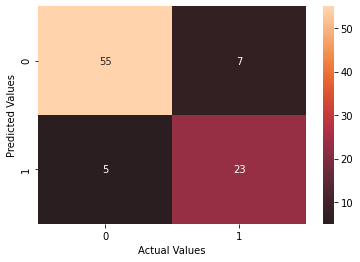

In [27]:
sns.heatmap(confusion_matrix(y_valid,grid_log.predict(x_scaled_valid)),annot=True,center=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [28]:
print(accuracy_score(y_valid,grid_log.predict(x_scaled_valid)))

0.8666666666666667


# KNN Model

In [29]:
knn_params={'n_neighbors':[5,10,15,40],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
            'weights':['uniform', 'distance'],
            'metric' :['euclidean', 'manhattan', 'minkowski'],
            'leaf_size':[20,30,40,50],
            }

In [30]:
grid_knn=GridSearchCV(KNeighborsClassifier(),knn_params)

In [31]:
grid_knn.fit(x_scaled_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40, 50],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [5, 10, 15, 40],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
grid_knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

In [33]:
grid_knn.best_score_

0.8177096273291925

In [34]:
print(classification_report(y_valid,grid_knn.predict(x_scaled_valid)))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        62
           1       0.74      0.82      0.78        28

    accuracy                           0.86        90
   macro avg       0.83      0.85      0.84        90
weighted avg       0.86      0.86      0.86        90



In [35]:
print(accuracy_score(y_valid,grid_knn.predict(x_scaled_valid)))

0.8555555555555555


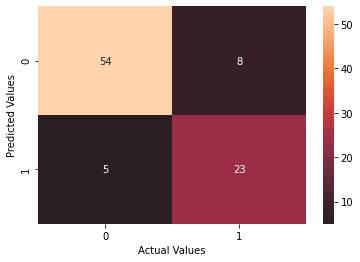

In [36]:
sns.heatmap(confusion_matrix(y_valid,grid_knn.predict(x_scaled_valid)),annot=True,center=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# SVC

In [37]:
svc_params={#'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
            'tol':[0.01,0.001,0.0001],
            'C':[1,10,100]
            }

In [38]:
svc_grid=GridSearchCV(SVC(),param_grid=svc_params,n_jobs=-1)

In [39]:
svc_grid.fit(x_scaled_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'tol': [0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [40]:
svc_grid.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.01,
    verbose=False)

In [41]:
print(classification_report(y_valid,svc_grid.predict(x_scaled_valid)))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        62
           1       0.79      0.79      0.79        28

    accuracy                           0.87        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.87      0.87      0.87        90



In [42]:
print(accuracy_score(y_valid,svc_grid.predict(x_scaled_valid)))

0.8666666666666667


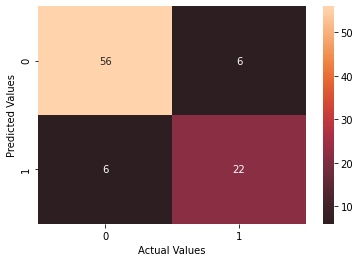

In [43]:
sns.heatmap(confusion_matrix(y_valid,svc_grid.predict(x_scaled_valid)),annot=True,center=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Random Forest 

In [44]:
rf_params={ 'n_estimators':[50,100,250,500],
           'max_depth':[5,10,20,32],
           'min_samples_split':[2,5,15,25],
           'min_samples_leaf':[1,5,15,20],
           'max_features':['sqrt','log2','auto'],
           'criterion':['gini','entropy']
}

In [45]:
rf_grid=GridSearchCV(RandomForestClassifier(),param_grid=rf_params)

In [46]:
rf_grid.fit(x_scaled_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=No...
                                              random_state=None, verbose=0,
                                   

In [47]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=32, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
rf_grid.best_score_

0.8377018633540374

In [49]:
print(accuracy_score(y_valid,rf_grid.predict(x_scaled_valid)))

0.8777777777777778


In [50]:
print(classification_report(y_valid,rf_grid.predict(x_scaled_valid)))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        62
           1       0.79      0.82      0.81        28

    accuracy                           0.88        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.88      0.88      0.88        90



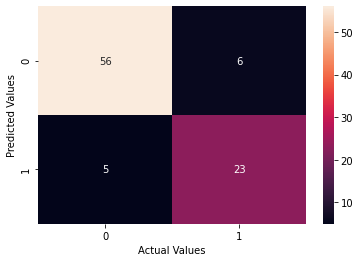

In [51]:
sns.heatmap(confusion_matrix(y_valid,rf_grid.predict(x_scaled_valid)),annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# CatBoost

In [52]:
pip install catboost

     |████████████████████████████████| 66.1MB 63kB/s 


In [53]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier()

In [54]:
cat.fit(x_train,y_train)

Learning rate set to 0.009371
0:	learn: 0.6871351	total: 49.2ms	remaining: 49.1s
1:	learn: 0.6827021	total: 50.5ms	remaining: 25.2s
2:	learn: 0.6774737	total: 51.8ms	remaining: 17.2s
3:	learn: 0.6709888	total: 53ms	remaining: 13.2s
4:	learn: 0.6644421	total: 54.3ms	remaining: 10.8s
5:	learn: 0.6595415	total: 55.5ms	remaining: 9.2s
6:	learn: 0.6537315	total: 56.7ms	remaining: 8.04s
7:	learn: 0.6488604	total: 57.9ms	remaining: 7.18s
8:	learn: 0.6437834	total: 59.1ms	remaining: 6.51s
9:	learn: 0.6396518	total: 60.3ms	remaining: 5.97s
10:	learn: 0.6340684	total: 61.5ms	remaining: 5.53s
11:	learn: 0.6294160	total: 62.7ms	remaining: 5.16s
12:	learn: 0.6248497	total: 63.9ms	remaining: 4.85s
13:	learn: 0.6211303	total: 64.8ms	remaining: 4.56s
14:	learn: 0.6170476	total: 66.2ms	remaining: 4.35s
15:	learn: 0.6131573	total: 67.2ms	remaining: 4.13s
16:	learn: 0.6086900	total: 68.4ms	remaining: 3.96s
17:	learn: 0.6056400	total: 69.6ms	remaining: 3.8s
18:	learn: 0.6023824	total: 70.3ms	remaining: 3.

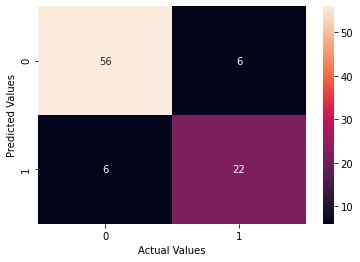

In [55]:
sns.heatmap(confusion_matrix(y_valid,cat.predict(x_valid)),annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [56]:
print(accuracy_score(y_valid,cat.predict(x_valid)))

0.8666666666666667


# Building final model on test dataset

In [58]:
test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Competitions/Titanic Kaggle/test_clean.csv')

In [59]:
passenger_details_test=test[['Name','Ticket','PassengerId']]
test.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [60]:
test.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Superior_Cabins',
       'male', '2', '3', 'Q', 'S', 'Miss', 'Mr', 'Mrs', 'Other', 'B', 'C', 'D',
       'E', 'F', 'G', 'U', 't'],
      dtype='object')

In [61]:
x.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Superior_Cabins',
       'male', '2', '3', 'Q', 'S', 'Miss', 'Mr', 'Mrs', 'Other', 'B', 'C', 'D',
       'E', 'F', 'G', 'T', 'U'],
      dtype='object')

In [62]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [63]:
test_scaled=scaler.transform(test)

In [68]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=32, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
rf_final=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=32, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
rf_final.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=32, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
predictions=rf_final.predict(test)

In [72]:
result=pd.DataFrame()
result['PassengerId']=passenger_details_test['PassengerId']
result['Survived']=predictions